### PROBLEM STATEMENT 

##### GOAL : To predict whether the Netflix user will churn or not based on demographic,suscription details, and user behaviours.

##### PROBLEM TYPE : CLASSIFICATION (0 AND 1)


### LOADING THE DATASET

In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score




### UNDERSTANDING THE DATASET

In [58]:
df= pd.read_csv("netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [59]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='str')

In [60]:
df['gender'].value_counts()

gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

In [61]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

ohhh, there is no null data so it will be easy for us

In [62]:
df.duplicated().sum()

np.int64(0)

wow , we got good dataset as it also don't have duplicated data

In [63]:
df.dtypes

customer_id                   str
age                         int64
gender                        str
subscription_type             str
watch_hours               float64
last_login_days             int64
region                        str
device                        str
monthly_fee               float64
churned                     int64
payment_method                str
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre                str
dtype: object

In [64]:
df.shape

(5000, 14)

we have 5000 user data with 14 features 

In [65]:
df.size

70000

In [66]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

my boy, we got a balanced dataset for classification.

In [67]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   str    
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   str    
 3   subscription_type       5000 non-null   str    
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   str    
 7   device                  5000 non-null   str    
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   str    
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   str    
dtypes: float64(3), int64(4), str(7)
memory usage: 547.0

In [68]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [69]:
df['number_of_profiles'].value_counts()

number_of_profiles
5    1034
2    1001
4     999
3     994
1     972
Name: count, dtype: int64

In [70]:
num_cols = df.select_dtypes(include= ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['string']).columns
print("Numerical Columns: ", len(num_cols))
print("Categorical Columns: ", len(cat_cols))

Numerical Columns:  7
Categorical Columns:  7


### DATA CLEANING

WE GOT THE DATASET WITHOUT NULL,DUPLICATED DATA SO WE DON'T NEED TO CLEAN THESE THINGS BUT WE HAVE TO DROP COLUMNS FOR MAKING IT READY FOR MODLE TRAINING.

In [71]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [72]:
df.drop(columns = ['customer_id'], inplace = True)
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre'],
      dtype='str')

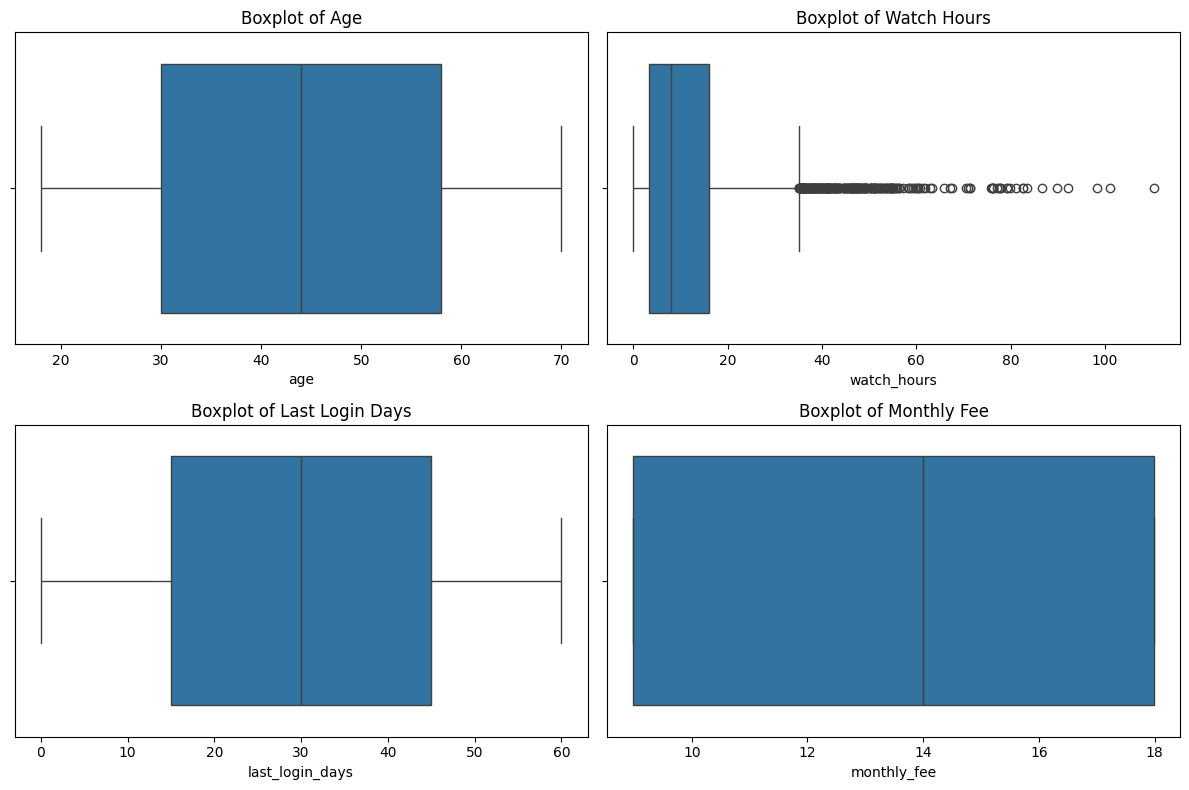

In [73]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)

sns.boxplot(x='age', data=df)
plt.title("Boxplot of Age")


plt.subplot(2,2,2)
sns.boxplot(x='watch_hours', data=df)
plt.title("Boxplot of Watch Hours")



plt.subplot(2,2,3)
sns.boxplot(x='last_login_days', data= df)
plt.title("Boxplot of Last Login Days")


plt.subplot(2,2,4)
sns.boxplot(x='monthly_fee', data=df)
plt.title("Boxplot of Monthly Fee")


plt.tight_layout()
plt.show()

here all the others features are well except the watch_hours so we cleaned it.

Here, the few users have more watch_hours than other users which will bias the model toward them we will cap the watch_hours.


In [74]:
upper_limit  = df['watch_hours'].quantile(0.99)
print("Upper limit for watch hours: ", upper_limit)

df['watch_hours']= df['watch_hours'].clip(upper= upper_limit)
df['watch_hours'].describe()

Upper limit for watch hours:  54.98150000000003


count    5000.000000
mean       11.488277
std        11.226075
min         0.010000
25%         3.337500
50%         8.000000
75%        16.030000
max        54.981500
Name: watch_hours, dtype: float64

here, we capped the extreme value and now the max value  is the value where the 99% users fall below it

In [75]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

this is also labelled well.

# EDA 


In [76]:
df.reset_index(drop=True, inplace=True)
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


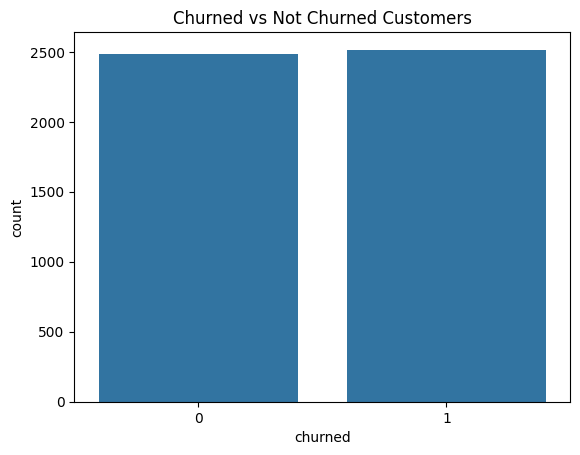

In [77]:
sns.countplot(x='churned',data=df)
plt.title("Churned vs Not Churned Customers")
plt.show()

Here, churned and Non-churned data are almost equal so the dataset is balanced and can be used for classification .

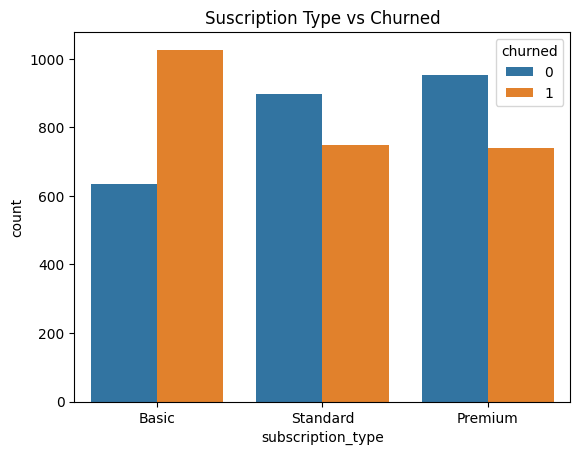

In [78]:
sns.countplot(x='subscription_type', hue='churned', data=df)
plt.title("Suscription Type vs Churned")
plt.show()

In dataset,there are three types of suscription and among them the basic suscription type users are mostly leaving the platform and we can see that premium suscription user are not leaving the netflix .

Text(0.5, 1.0, 'Device Distribution')

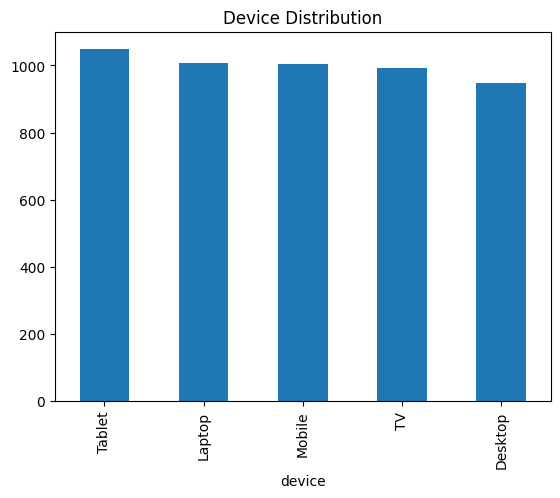

In [79]:
device_count= df['device'].value_counts()
device_count.plot(kind='bar')
plt.title("Device Distribution")

The more users are using tablet to watch the netflix. But all most all types of devices are used by users.

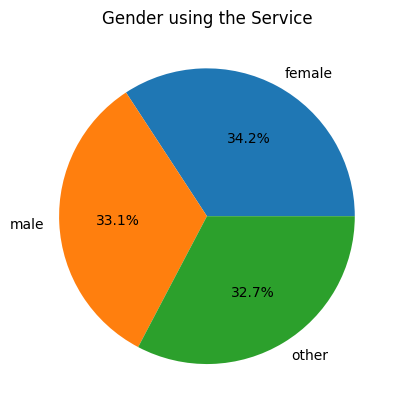

In [80]:
plt.pie(df['gender'].value_counts(),labels=['female','male','other'],autopct='%1.1f%%')
plt.title("Gender using the Service")
plt.show()

Here, Almost all genders are using the netflix service, the intersting thing is that their is other quite high than expected. It might be because while login the user may not selected the gender and it might be  auto selected. 

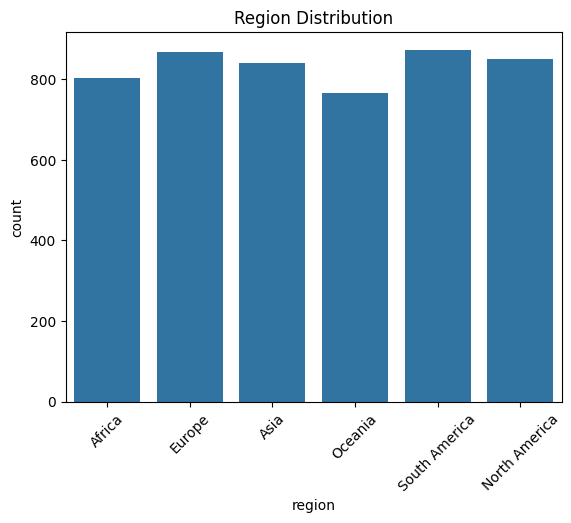

In [81]:
sns.countplot(x='region', data=df)
plt.title("Region Distribution")
plt.xticks(rotation=45)
plt.show()

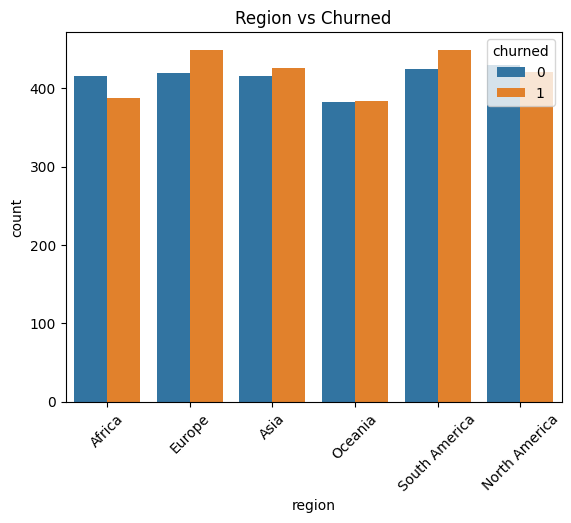

In [82]:
sns.countplot(x='region', hue='churned', data=df)
plt.title("Region vs Churned")
plt.xticks(rotation=45) 
plt.show()

we can see that the europe and south america users are leaving the platform while there is less churned user in oceania. No focus on Europe and South America to increase the user.

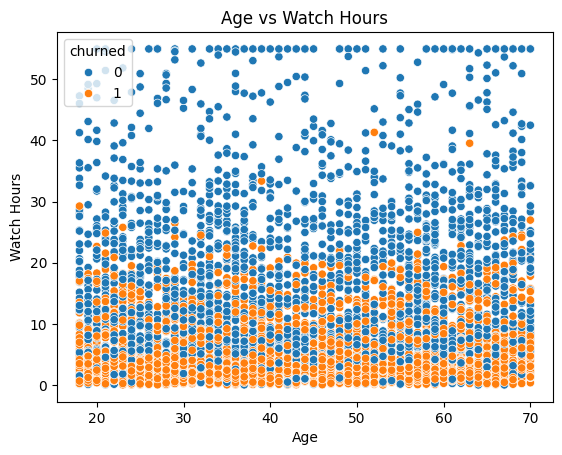

In [83]:
sns.scatterplot(x='age', y='watch_hours', hue='churned', data=df)
plt.title("Age vs Watch Hours")
plt.xlabel("Age")
plt.ylabel("Watch Hours")
plt.show()

First of all I like the plot ,what a beautiful plot it is. From plot, we can observe that we have user from age=18 to 70 and we can clearly see that user having less watch_hours are leaving the platform more than users with less watch_hours. It means we have old users who have more watch_hours and it is less chance that old user will leave the platform as per data.

The other things I like from the plot is that the old age user are also using the platform as much as the young age user. Here the dataset is quite impressive because in most of case the old age(60-70) have less watch hours but here they are giving competition to young age user.

In [84]:
pd.crosstab(df['subscription_type'], df['churned'], normalize='index')

churned,0,1
subscription_type,,
Basic,0.381698,0.618302
Premium,0.562906,0.437094
Standard,0.545565,0.454435


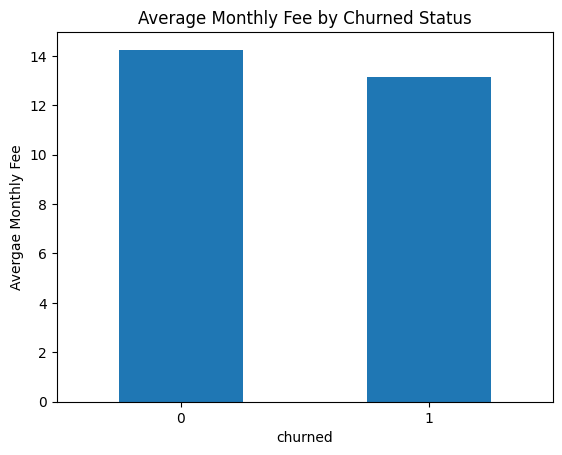

In [85]:
df.groupby('churned')['monthly_fee'].mean().plot(kind='bar')
plt.title("Average Monthly Fee by Churned Status")
plt.xlabel("churned")
plt.ylabel("Avergae Monthly Fee")
plt.xticks(rotation=0)
plt.show()

From here, We can observe that the user having average monthly fee around 14 is not leaving the platform while users having the avergae monthly fee around 13 are leaving the platform must.

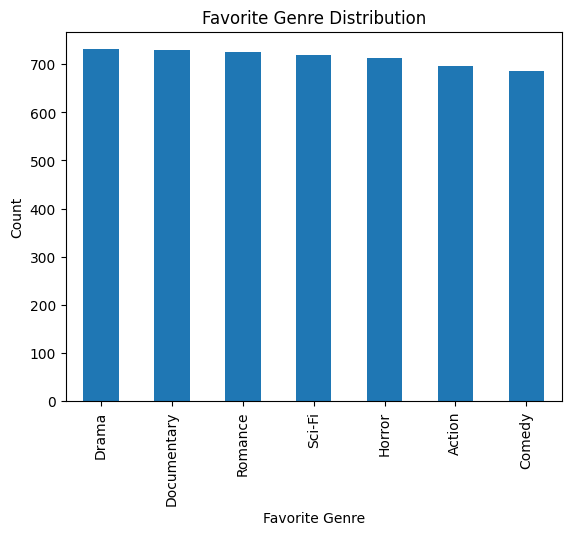

In [86]:
df['favorite_genre'].value_counts().plot(kind='bar')
plt.title("Favorite Genre Distribution")
plt.xlabel("Favorite Genre")
plt.ylabel("Count")
plt.show()

here we can observe that the platform is used by the users having interest in almost every genre. Users using netflix loves to watch every genre equally

In [87]:
genre_churn = (
    df.groupby(['favorite_genre', 'churned'])
    .size()
    .unstack(fill_value=0)
)

print(genre_churn)

churned           0    1
favorite_genre          
Action          332  365
Comedy          343  342
Documentary     359  370
Drama           349  382
Horror          346  367
Romance         375  350
Sci-Fi          381  339


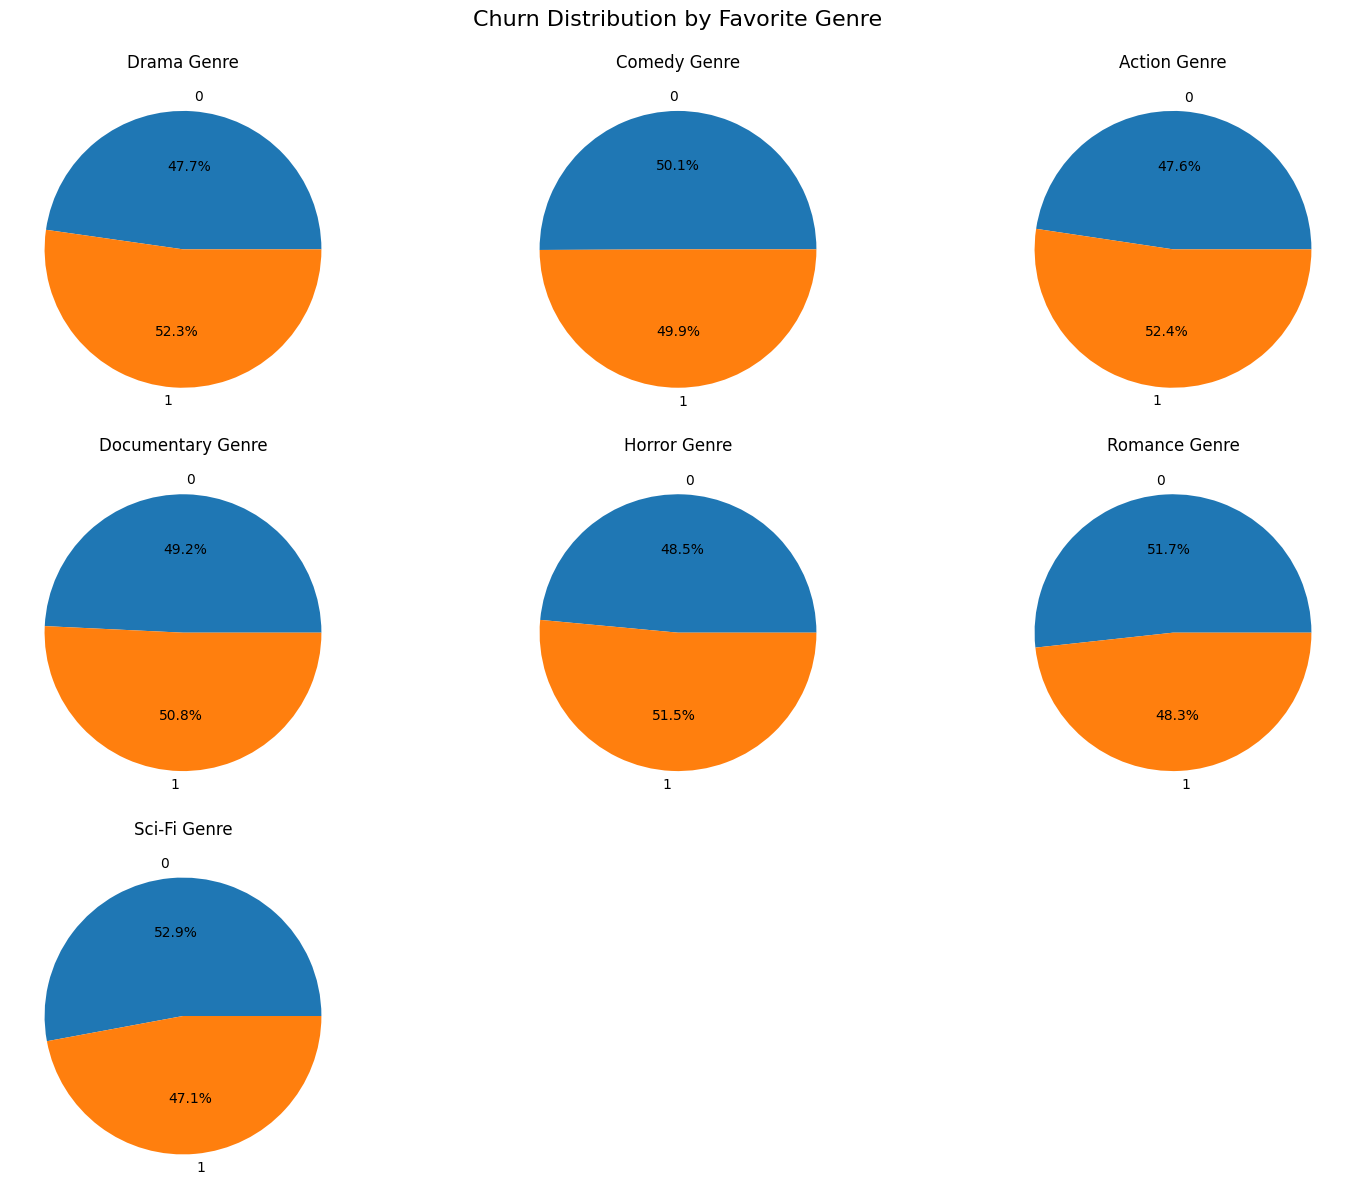

In [88]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
plt.pie(genre_churn.loc['Drama'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Drama Genre")

plt.subplot(3, 3, 2)
plt.pie(genre_churn.loc['Comedy'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Comedy Genre")

plt.subplot(3, 3, 3)
plt.pie(genre_churn.loc['Action'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Action Genre")

plt.subplot(3, 3, 4)
plt.pie(genre_churn.loc['Documentary'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Documentary Genre")

plt.subplot(3, 3, 5)    
plt.pie(genre_churn.loc['Horror'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Horror Genre")

plt.subplot(3, 3, 6)
plt.pie(genre_churn.loc['Romance'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Romance Genre")

plt.subplot(3, 3, 7)
plt.pie(genre_churn.loc['Sci-Fi'], labels=genre_churn.columns, autopct='%1.1f%%')
plt.title("Sci-Fi Genre")

plt.suptitle("Churn Distribution by Favorite Genre", fontsize=16, y=0.995)
plt.tight_layout()
plt.show()


```markdown
### Insights from Genre-wise Churn Distribution

From the pie charts analyzing churn distribution across different favorite genres, we can derive the following insights:

1. **Drama Genre**: Shows the highest churn rate (~52.3%) among all genres. Users who prefer drama content are more likely to leave the platform.

2. **Documentary Genre**: Also exhibits a high churn rate (~50.7%), suggesting documentary enthusiasts have a slightly lower retention compared to other genres but still significant.

3. **Horror Genre**: Demonstrates a moderate-to-high churn rate (~51.5%), indicating horror fans are also leaving the platform at notable rates.

4. **Action Genre**: Shows a near-balanced churn distribution (~52.4% churn), with slightly more users leaving than staying.

5. **Comedy Genre**: Maintains an almost perfect balance between churned (49.9%) and non-churned users (50.1%), suggesting comedy content provides good retention.

6. **Sci-Fi Genre**: Exhibits the lowest churn rate (~47.1%) among all genres, indicating that Sci-Fi enthusiasts have the highest loyalty and retention on the platform.

7. **Romance Genre**: Shows the most favorable retention rate (~51.8% non-churned), with romance viewers being more likely to stay on the platform.

**Key Takeaway**: Sci-Fi and Romance genres demonstrate better user retention, while Drama and Documentary content users show higher churn rates. Netflix should focus on improving drama and documentary content quality or consider exclusive releases in these genres to improve retention.
```

In [89]:
df.sample(5)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
715,58,Female,Standard,23.39,52,Asia,Tablet,13.99,0,Credit Card,1,0.44,Comedy
1715,35,Male,Premium,11.07,12,Europe,Tablet,17.99,0,PayPal,3,0.85,Horror
4040,66,Male,Standard,1.65,44,Africa,TV,13.99,1,PayPal,2,0.04,Romance
4837,61,Female,Standard,30.00,50,North America,Mobile,13.99,0,Credit Card,2,0.59,Comedy
4508,31,Female,Premium,5.68,49,Asia,Laptop,17.99,1,Crypto,2,0.11,Comedy


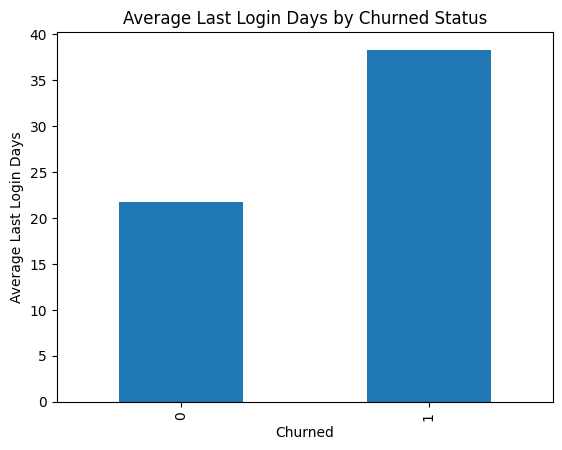

In [90]:
df.groupby('churned')['last_login_days'].mean().plot(kind='bar')
plt.title("Average Last Login Days by Churned Status")
plt.xlabel("Churned")
plt.ylabel("Average Last Login Days")
plt.show()

From this we can know that if the average last login days is under the 25 days then the user is still using the platform and we can say that the if the average login days of the user is around 38 then the user left the platform.

In [91]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre'],
      dtype='str')

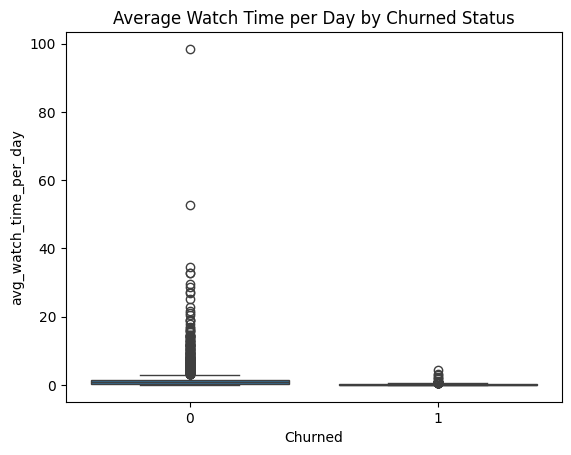

In [92]:
sns.boxplot(x='churned', y='avg_watch_time_per_day', data=df)
plt.title("Average Watch Time per Day by Churned Status")
plt.xlabel("Churned")
plt.show()


```markdown
### Boxplot Analysis: Average Watch Time per Day by Churned Status

The boxplot reveals the following insights about average daily watch time and customer churn:

1. **Churned Users (1)**: 
    - Have a significantly lower median watch time per day
    - The distribution is concentrated at the lower end, indicating churned customers watched less content daily
    - This suggests low engagement is a strong indicator of churn

2. **Active Users (0)**:
    - Have a higher median and overall distribution of average watch time per day
    - Show more variation and higher values, indicating consistent engagement
    - Users who watch more daily are more likely to retain

3. **Key Insight**: 
    - There is a clear separation between the two groups, with non-churned users having notably higher daily watch times
    - This metric is a strong predictor of churn - users with low daily watch engagement are at high risk of leaving the platform
    - Netflix should focus on increasing daily engagement for users showing low watch time patterns to reduce churn

**Conclusion**: Average watch time per day is an important feature for predicting churn, with engaged users (higher daily watch time) being significantly more likely to stay on the platform.
```

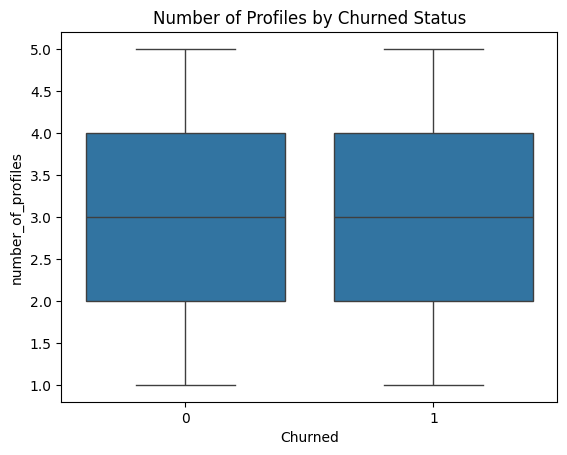

In [93]:
sns.boxplot(x='churned',y='number_of_profiles', data=df)
plt.title("Number of Profiles by Churned Status")
plt.xlabel("Churned")
plt.show()

In [94]:
df['multiprofile'] = df['number_of_profiles']>1;

pd.crosstab(df['multiprofile'], df['churned'], normalize='index')

churned,0,1
multiprofile,,
False,0.41358,0.58642
True,0.51713,0.48287


we can observe that the user having single profile are leaving platform as compare to user having multiprofile . so the netflix should focus on the family pacakage subscription than only user will not left the platform according to this dataset.

In [95]:
df.sample(5)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,multiprofile
1596,49,Female,Standard,11.88,41,Asia,Desktop,13.99,0,Credit Card,4,0.28,Horror,True
1361,23,Other,Basic,28.57,55,Oceania,Desktop,8.99,0,PayPal,3,0.51,Drama,True
4848,28,Female,Standard,25.72,60,Europe,Tablet,13.99,0,Crypto,3,0.42,Comedy,True
1640,44,Male,Premium,13.56,14,Asia,Desktop,17.99,0,Debit Card,1,0.90,Documentary,False
1110,39,Male,Standard,31.83,2,Africa,Mobile,13.99,0,Crypto,5,10.61,Horror,True


In [96]:
num_df = df[[
'age', 'watch_hours', 'last_login_days', 'monthly_fee', 'avg_watch_time_per_day', 'number_of_profiles','churned'
]]

corr_matrix = num_df.corr()
corr_matrix

,age,watch_hours,last_login_days,monthly_fee,avg_watch_time_per_day,number_of_profiles,churned
age,1.000000,0.027661,0.016769,-0.013943,0.010355,0.017333,-0.003515
watch_hours,0.027661,1.000000,0.003274,0.009073,0.330707,0.013268,-0.499182
last_login_days,0.016769,0.003274,1.000000,-0.000789,-0.338418,0.017242,0.471590
monthly_fee,-0.013943,0.009073,-0.000789,1.000000,-0.010401,0.021905,-0.152117
avg_watch_time_per_day,0.010355,0.330707,-0.338418,-0.010401,1.000000,-0.001246,-0.272958
number_of_profiles,0.017333,0.013268,0.017242,0.021905,-0.001246,1.000000,-0.158614
churned,-0.003515,-0.499182,0.471590,-0.152117,-0.272958,-0.158614,1.000000


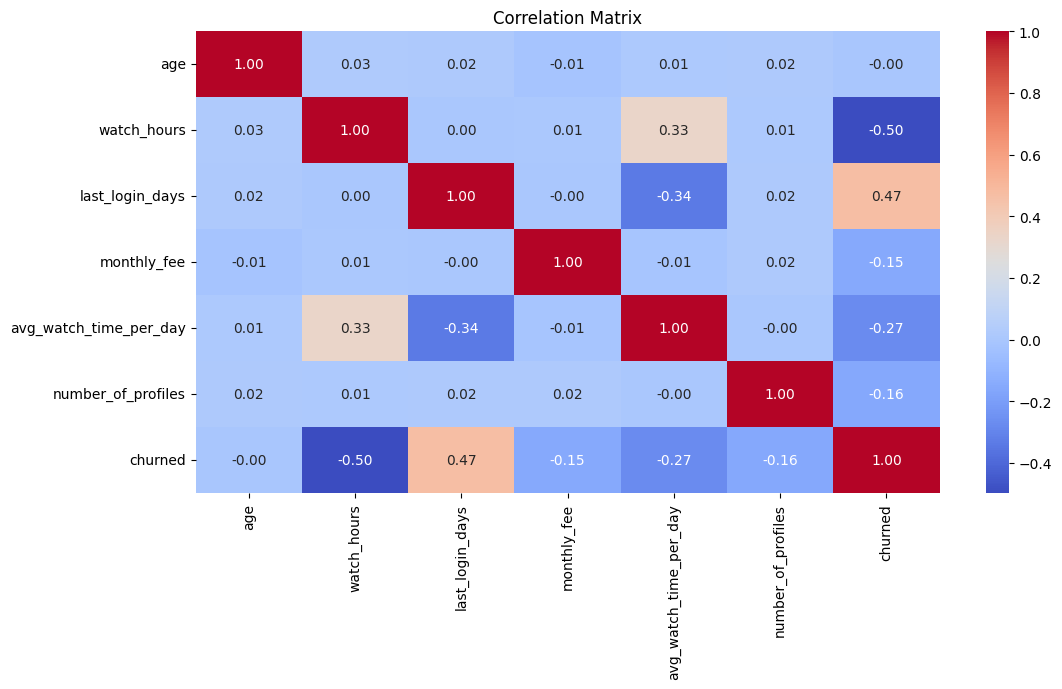

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

** Here we can observe that ** 
- watch_hours -> -0.50  

       means less highest watch hours than low churned rate. strong negative correlation


- last_login_days -> 0.47 

       the more last_login days means more the user churned . strong positive correlation

- avg_watch_time_per_day -> -0.27

       says that the more avg watch time per day ,less the user churned

- monthly_fee → -0.152

      Weak-to-moderate negative correlation

      Higher-paying users churn slightly less

- number_of_profiles → -0.159

      Multi-profile users churn less

      Family/shared accounts are stickier


- age → -0.003

       Practically zero correlation

       Age does not directly affect churn

       here age only is not strong churn predictor

In [98]:
df.sample(5)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,multiprofile
2734,48,Male,Premium,1.64,11,North America,Mobile,17.99,1,Gift Card,1,0.14,Drama,False
3264,56,Other,Premium,9.96,51,Oceania,Tablet,17.99,1,Gift Card,3,0.19,Drama,True
4886,25,Female,Standard,7.36,1,North America,Mobile,13.99,0,PayPal,4,3.68,Comedy,True
2134,34,Male,Standard,45.52,52,South America,Laptop,13.99,0,Credit Card,3,0.86,Action,True
556,43,Male,Standard,31.73,34,Asia,TV,13.99,0,Credit Card,3,0.91,Horror,True


### Distribution Plot

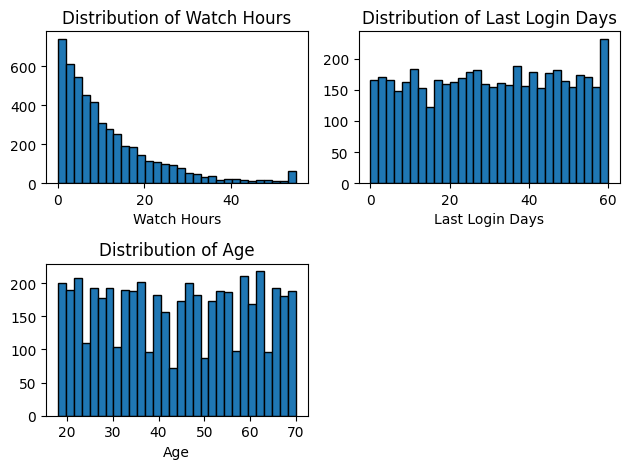

In [99]:
plt.subplot(2,2,1)
plt.hist(df['watch_hours'], bins=30, edgecolor='k')
plt.title("Distribution of Watch Hours")
plt.xlabel("Watch Hours")   


plt.subplot(2,2,2)
plt.hist(df['last_login_days'], bins=30, edgecolor='k')
plt.title("Distribution of Last Login Days")
plt.xlabel("Last Login Days")


plt.subplot(2,2,3)
plt.hist(df['age'], bins=30, edgecolor='k')
plt.title("Distribution of Age")
plt.xlabel("Age")


plt.tight_layout()
plt.show()

### Insights from Distribution Plots

- **Watch Hours**: The distribution is right-skewed with most users clustered at lower watch hours, indicating a smaller group of heavy watchers.
- **Last Login Days**: Values are spread with a noticeable concentration at lower days, suggesting many users are relatively active, while a subset is inactive for longer periods.
- **Age**: The age distribution appears fairly broad with a mild central concentration, indicating a diverse user base across age groups.

# Feature Engineering 

In [100]:
df['engagement_score'] = (df['watch_hours'] / (df['last_login_days'] + 1))
df['engagement_score'].corr(df['churned'])

np.float64(-0.29850131591228807)

Here it means the more is engagement less the user will be churned.

In [101]:
df['low_activity_flag'] = (df['last_login_days'] > 30).astype(int)
df['low_activity_flag'].corr(df['churned'])

np.float64(0.4897208655647002)

When the low_activity_flag is high more the user will be churned.


In [102]:
df['high_fee_flag'] = (df['monthly_fee'] > df['monthly_fee'].median()).astype(int)
df['high_fee_flag'].corr(df['churned'])

np.float64(-0.0943136823068528)

From here we can know that more the user payed or used premium suscription less will the user will be churned.

In [103]:
df.groupby('payment_method')['churned'].mean().sort_values()


payment_method
Credit Card    0.435766
Debit Card     0.436893
PayPal         0.470760
Gift Card      0.577869
Crypto         0.596985
Name: churned, dtype: float64

payment method is not contributing to much on churned as the churn rates is same for all types of payment method.

# Encoding


In [104]:
df.drop(columns=['number_of_profiles','avg_watch_time_per_day','payment_method'], inplace=True)   


In [105]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'favorite_genre',
       'multiprofile', 'engagement_score', 'low_activity_flag',
       'high_fee_flag'],
      dtype='str')

In [106]:
df['multiprofile'] = df['multiprofile'].astype(int)

In [107]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,favorite_genre,multiprofile,engagement_score,low_activity_flag,high_fee_flag
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Action,0,0.491000,0,0
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Sci-Fi,1,0.035000,0,0
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Drama,1,1.483636,0,0
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Horror,1,0.346923,0,1
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Action,1,0.135000,0,0


In [108]:
cat_cols = ['gender', 'subscription_type', 'device', 'region', 'favorite_genre']
num_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'engagement_score']
binary_cols = ['low_activity_flag', 'high_fee_flag', 'multiprofile']

In [109]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

In [110]:
x = df.drop(columns=['churned'])
y= df['churned']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [112]:

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [113]:
model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different trans

In [ ]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_prob))

Using Random Forest model

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_model= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

In [ ]:
rf_model.fit(x_train, y_train)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       498
           1       0.89      0.89      0.89       502

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

Confusion Matrix:
 [[442  56]
 [ 55 447]]
ROC AUC Score:  0.9633914142626282


In [116]:
model.named_steps['classifier'].coef_


array([[ 3.01021844e-03, -3.11707007e+00,  4.81530395e-01,
        -6.38609098e-01, -4.94137884e+00, -1.36653189e-01,
        -3.42503490e-01, -1.90800101e-01,  3.30020996e-01,
        -1.25165021e-01, -8.74812755e-01, -2.32208174e-01,
         7.28648181e-02, -1.82960909e-01, -8.75620652e-02,
        -2.40090451e-01, -2.33840886e-01, -1.53879235e-01,
        -7.37213563e-02, -1.09715879e-01, -5.01663666e-02,
        -4.86330560e-02, -9.82182828e-02, -1.72285436e-01,
        -2.78821225e-01,  2.57075840e-01, -1.13096251e-01,
        -1.78998303e-01, -8.56131223e-02,  3.35662108e+00,
        -1.25165021e-01, -1.53163209e+00]])